In [1]:
import os
os.chdir('E:/Assignment 05 - Neural Networks and Evaluating Results2/Music_Symbols/Music_Symbols')
#import split_folders


# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#split_folders.fixed('E:/Assignment 05 - Neural Networks and Evaluating Results2/Music_Symbols/Music_Symbols/NDS', output="OUTPUT", seed=1337, fixed=(10,10), oversample=False)
#split_folders.ratio('E:/Assignment 05 - Neural Networks and Evaluating Results2/Music_Symbols', output='E:/Assignment 05 - Neural Networks and Evaluating Results2/Music_Symbols/NDS1', seed=1337, ratio=(.8, .2)) # default values

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
#split_folders.fixed('input_folder', output="output", seed=1337, fixed=(100, 100), oversample=False) # default values

In [2]:
import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#split_folders.ratio('E:/Assignment 05 - Neural Networks and Evaluating Results2/Music_Symbols/Music_Symbols/NDS/', output="output", seed=1337, ratio=(.8, .2)) # default values

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
split_folders.fixed('E:/Assignment 05 - Neural Networks and Evaluating Results2/Music_Symbols/Music_Symbols', output="output", seed=1337, fixed=(100, 100), oversample=False) # default values

Copying files: 4098 files [00:22, 179.29 files/s]


In [6]:
from PIL import Image
import os, sys
os.chdir('E:/NeuralNetwork2/NACCDS/')

path = "E:/NeuralNetwork2/NACCDS/"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((20,20), Image.ANTIALIAS)
            imResize.save(f + ' resized.jpg', 'JPEG', quality=90)

resize()

In [7]:
import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#split_folders.ratio('E:/Assignment 05 - Neural Networks and Evaluating Results2/Music_Symbols/Music_Symbols/NDS/', output="output", seed=1337, ratio=(.8, .2)) # default values

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
split_folders.fixed('E:/NeuralNetwork2', output="output", seed=1337, fixed=(100, 100), oversample=False) # default values

Copying files: 4114 files [00:20, 200.76 files/s]


In [8]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import re

# Pillow
import PIL
from PIL import Image

In [9]:
# Use Pillow library to convert an input jpeg to a 8 bit grey scale image array for processing.
def jpeg_to_8_bit_greyscale(path, maxsize):
        img = Image.open(path).convert('L')   # convert image to 8-bit grayscale
        # Make aspect ratio as 1:1, by applying image crop.
    
        WIDTH, HEIGHT = img.size
        if WIDTH != HEIGHT:
                m_min_d = min(WIDTH, HEIGHT)
                img = img.crop((0, 0, m_min_d, m_min_d))
# Scale the image to the requested maxsize by Anti-alias sampling.
        img.thumbnail(maxsize, PIL.Image.ANTIALIAS)
        return np.asarray(img)

In [10]:
#NACCDS= Not accidental double sharp ACCDS=accidental double sharp

def load_image_dataset(path_dir, maxsize):
        images = []
        labels = []
        os.chdir(path_dir)
        for file in glob.glob("*.jpg"):
                img = jpeg_to_8_bit_greyscale(file, maxsize)
                if re.match('ACCDS.*', file):
                        images.append(img)
                        labels.append(0)
                elif re.match('NACCDS.*', file):
                        images.append(img)
                        labels.append(1)
        return (np.asarray(images), np.asarray(labels))

In [11]:
maxsize = 20, 20

In [12]:
(train_images, train_labels) = load_image_dataset('E:/NeuralNetwork2/output/train', maxsize)

(test_images, test_labels) = load_image_dataset('E:/NeuralNetwork2/output/train', maxsize)

In [13]:
class_names = ['ACCDS', 'NACCDS']

In [14]:
train_images.shape

(3714, 20, 20)

In [15]:
test_images.shape

(3714, 20, 20)

In [16]:
print(train_labels)

[0 0 0 ... 1 1 1]


In [18]:
print(train_labels)

[0 0 0 ... 1 1 1]


In [20]:
def display_images(images, labels):
        plt.figure(figsize=(10,10))
        grid_size = min(25, len(images))
        for i in range(grid_size):
                plt.subplot(5, 5, i+1)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                plt.imshow(images[i], cmap=plt.cm.binary)
                plt.xlabel(class_names[labels[i]])

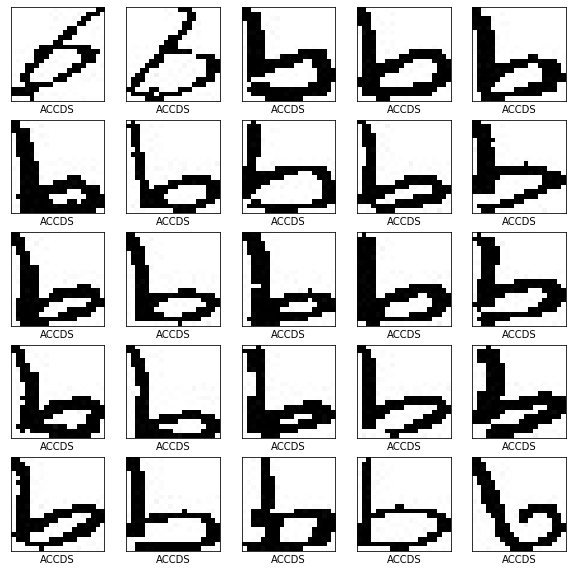

In [21]:
display_images(test_images, test_labels)
plt.show()

In [22]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [23]:
# Setting up the layers.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 20)),
        keras.layers.Dense(128, activation=tf.nn.sigmoid),
        keras.layers.Dense(16, activation=tf.nn.sigmoid),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [24]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.7, nesterov=True)

model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs=200)

Epoch 1/200
3714/3714 [==============================] - ETA: 21s - loss: 0.6855 - acc: 0.59 - ETA: 1s - loss: 0.3977 - acc: 0.9000 - ETA: 0s - loss: 0.3632 - acc: 0.898 - ETA: 0s - loss: 0.3372 - acc: 0.904 - ETA: 0s - loss: 0.3255 - acc: 0.907 - ETA: 0s - loss: 0.3178 - acc: 0.910 - ETA: 0s - loss: 0.3121 - acc: 0.911 - 1s 151us/sample - loss: 0.3096 - acc: 0.9117
Epoch 2/200
3714/3714 [==============================] - ETA: 1s - loss: 0.3067 - acc: 0.906 - ETA: 0s - loss: 0.3240 - acc: 0.896 - ETA: 0s - loss: 0.2971 - acc: 0.908 - ETA: 0s - loss: 0.2861 - acc: 0.912 - 0s 65us/sample - loss: 0.2815 - acc: 0.9146
Epoch 3/200
3714/3714 [==============================] - ETA: 0s - loss: 0.3005 - acc: 0.906 - ETA: 1s - loss: 0.3270 - acc: 0.890 - ETA: 0s - loss: 0.2883 - acc: 0.908 - ETA: 0s - loss: 0.2728 - acc: 0.914 - ETA: 0s - loss: 0.2659 - acc: 0.917 - ETA: 0s - loss: 0.2675 - acc: 0.916 - ETA: 0s - loss: 0.2648 - acc: 0.917 - 0s 101us/sample - loss: 0.2707 - acc: 0.9146
Epoch 4/20

Epoch 41/200
3714/3714 [==============================] - ETA: 1s - loss: 0.0831 - acc: 0.968 - ETA: 1s - loss: 0.2068 - acc: 0.879 - ETA: 0s - loss: 0.1858 - acc: 0.894 - ETA: 0s - loss: 0.1809 - acc: 0.891 - ETA: 0s - loss: 0.1717 - acc: 0.899 - ETA: 0s - loss: 0.1654 - acc: 0.904 - 0s 99us/sample - loss: 0.1624 - acc: 0.9066
Epoch 42/200
3714/3714 [==============================] - ETA: 0s - loss: 0.0602 - acc: 0.968 - ETA: 0s - loss: 0.1439 - acc: 0.928 - ETA: 0s - loss: 0.1610 - acc: 0.908 - ETA: 0s - loss: 0.1623 - acc: 0.907 - 0s 59us/sample - loss: 0.1619 - acc: 0.9074
Epoch 43/200
3714/3714 [==============================] - ETA: 0s - loss: 0.1519 - acc: 0.937 - ETA: 0s - loss: 0.1577 - acc: 0.912 - ETA: 0s - loss: 0.1556 - acc: 0.913 - ETA: 0s - loss: 0.1597 - acc: 0.912 - 0s 64us/sample - loss: 0.1620 - acc: 0.9087
Epoch 44/200
3714/3714 [==============================] - ETA: 2s - loss: 0.1152 - acc: 0.968 - ETA: 0s - loss: 0.1598 - acc: 0.914 - ETA: 0s - loss: 0.1496 - acc

3714/3714 [==============================] - ETA: 1s - loss: 0.0753 - acc: 0.937 - ETA: 2s - loss: 0.1233 - acc: 0.906 - ETA: 1s - loss: 0.1148 - acc: 0.933 - ETA: 1s - loss: 0.1329 - acc: 0.933 - ETA: 0s - loss: 0.1502 - acc: 0.916 - ETA: 0s - loss: 0.1466 - acc: 0.915 - ETA: 0s - loss: 0.1430 - acc: 0.916 - ETA: 0s - loss: 0.1451 - acc: 0.916 - 0s 128us/sample - loss: 0.1526 - acc: 0.9090
Epoch 88/200
3714/3714 [==============================] - ETA: 1s - loss: 0.1754 - acc: 0.906 - ETA: 0s - loss: 0.1696 - acc: 0.904 - ETA: 0s - loss: 0.1569 - acc: 0.901 - ETA: 0s - loss: 0.1614 - acc: 0.898 - ETA: 0s - loss: 0.1519 - acc: 0.906 - ETA: 0s - loss: 0.1514 - acc: 0.909 - 0s 81us/sample - loss: 0.1520 - acc: 0.9098
Epoch 89/200
3714/3714 [==============================] - ETA: 1s - loss: 0.1187 - acc: 0.968 - ETA: 0s - loss: 0.1682 - acc: 0.900 - ETA: 0s - loss: 0.1527 - acc: 0.912 - ETA: 0s - loss: 0.1535 - acc: 0.910 - ETA: 0s - loss: 0.1530 - acc: 0.909 - 0s 73us/sample - loss: 0.152

3714/3714 [==============================] - ETA: 0s - loss: 0.2417 - acc: 0.812 - ETA: 3s - loss: 0.2103 - acc: 0.859 - ETA: 4s - loss: 0.2127 - acc: 0.854 - ETA: 2s - loss: 0.1786 - acc: 0.896 - ETA: 0s - loss: 0.1565 - acc: 0.911 - ETA: 0s - loss: 0.1474 - acc: 0.916 - ETA: 0s - loss: 0.1469 - acc: 0.915 - 0s 108us/sample - loss: 0.1477 - acc: 0.9141
Epoch 139/200
3714/3714 [==============================] - ETA: 0s - loss: 0.1967 - acc: 0.906 - ETA: 0s - loss: 0.1259 - acc: 0.937 - ETA: 0s - loss: 0.1394 - acc: 0.921 - ETA: 0s - loss: 0.1467 - acc: 0.915 - 0s 54us/sample - loss: 0.1476 - acc: 0.9128
Epoch 140/200
3714/3714 [==============================] - ETA: 0s - loss: 0.2183 - acc: 0.843 - ETA: 0s - loss: 0.1537 - acc: 0.903 - ETA: 0s - loss: 0.1518 - acc: 0.905 - ETA: 0s - loss: 0.1492 - acc: 0.906 - ETA: 0s - loss: 0.1476 - acc: 0.911 - 0s 62us/sample - loss: 0.1475 - acc: 0.9122
Epoch 141/200
3714/3714 [==============================] - ETA: 0s - loss: 0.1592 - acc: 0.875 -

3714/3714 [==============================] - ETA: 9s - loss: 0.1714 - acc: 0.843 - ETA: 0s - loss: 0.1541 - acc: 0.908 - ETA: 0s - loss: 0.1478 - acc: 0.915 - ETA: 0s - loss: 0.1523 - acc: 0.909 - ETA: 0s - loss: 0.1490 - acc: 0.911 - ETA: 0s - loss: 0.1486 - acc: 0.910 - ETA: 0s - loss: 0.1482 - acc: 0.909 - ETA: 0s - loss: 0.1454 - acc: 0.912 - ETA: 0s - loss: 0.1466 - acc: 0.911 - 1s 160us/sample - loss: 0.1448 - acc: 0.9128
Epoch 181/200
3714/3714 [==============================] - ETA: 0s - loss: 0.1394 - acc: 0.968 - ETA: 0s - loss: 0.1337 - acc: 0.930 - ETA: 0s - loss: 0.1431 - acc: 0.917 - ETA: 0s - loss: 0.1434 - acc: 0.914 - ETA: 0s - loss: 0.1446 - acc: 0.912 - ETA: 0s - loss: 0.1447 - acc: 0.913 - 0s 90us/sample - loss: 0.1446 - acc: 0.9133
Epoch 182/200
3714/3714 [==============================] - ETA: 0s - loss: 0.0824 - acc: 0.937 - ETA: 0s - loss: 0.1586 - acc: 0.901 - ETA: 0s - loss: 0.1556 - acc: 0.903 - ETA: 0s - loss: 0.1535 - acc: 0.902 - ETA: 0s - loss: 0.1500 - a

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


3714/3714 [==============================] - ETA: 7s - loss: 0.9002 - acc: 0.093 - ETA: 0s - loss: 0.2594 - acc: 0.801 - 0s 44us/sample - loss: 0.1433 - acc: 0.9152


In [28]:
print('Test accuracy:', test_acc)

Test accuracy: 0.9151858


In [29]:
predictions = model.predict(test_images)

In [30]:
print(predictions)

[[2.8273934e-01 7.1726066e-01]
 [4.1655657e-01 5.8344340e-01]
 [4.8093846e-01 5.1906157e-01]
 ...
 [1.6327994e-04 9.9983668e-01]
 [1.6024239e-04 9.9983978e-01]
 [8.8724526e-05 9.9991131e-01]]


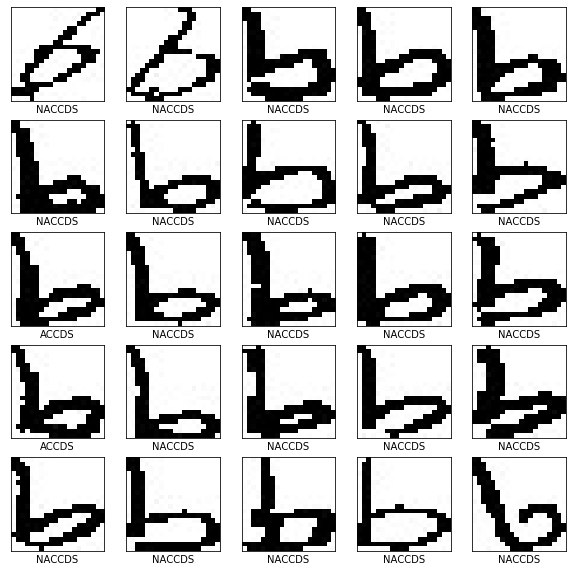

In [31]:
display_images(test_images, np.argmax(predictions, axis = 1))
plt.show()